# UNIT 7 우리 동네 인구 구조 시각화하기
행정안전부에서 제공하는 '연령별 인구 현황 데이터'를 분석해보자.  
- [행정안전부](http://www.mois.go.kr)  
(정책자료 → 통계 → 주민등록 인구 → 통계 → 연령별 인구현황 → 통계표)  
2019년 2월의 데이터를 가져와본 결과 header는 다음과 같은 형태로 되어있다.  
- 행정구역
- 총인구수
- 연령구간인구수
- 0세~100세  
(계O, 남여구분X) → age.csv  
(계X, 남여구분O) → gender.csv

이 데이터에서 신도림의 인구 데이터만 골라서 그래프로 그려보자.

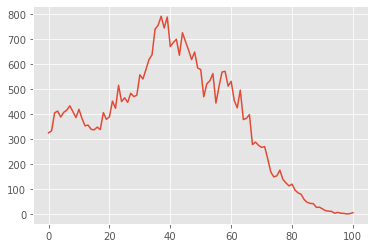

In [3]:
# 신도림동 지역의 인구 구조
import csv
import matplotlib.pyplot as plt
f = open('age.csv')
data = csv.reader(f)
next(data)
result = []
for row in data:
    if '신도림' in row[0]:
        for i in row[3:]:
            result.append(int(i))
plt.style.use('ggplot')
plt.plot(result)
plt.show()

이러한 그래프를 통해 특정 지역의 특성을 파악할 수 있다.  
ex) 신도림동은 30대 중후반의 사람들이 많고 10세 이하의 아이가 10대 후반 청소년보다 많다.

# UNIT 8 인구 구조를 다양한 형태로 시각화하기  
## 막대그래프  
막대그래프에서 막대의 길이는 각 데이터의 크기를 의미한다.  
```bar(막대를 표시할 위치, 막대의 높이)```  
barh()함수를 이용하면 막대그래프를 수직이 아닌 수평방향으로 그릴 수 있다.

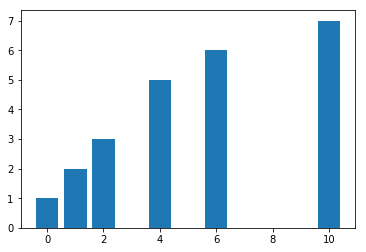

In [5]:
# 막대그래프 그리기
import matplotlib.pyplot as plt
plt.bar([0, 1, 2, 4, 6, 10], [1, 2, 3, 5, 6, 7])
plt.show()

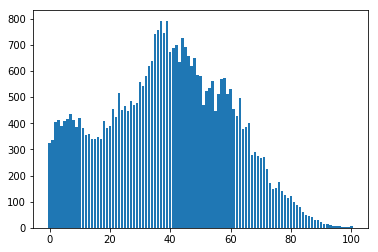

In [6]:
# 신도림동의 인구 데이터를 막대그래프로 나타내기
import csv
f = open('age.csv')
data = csv.reader(f)

result = []
for row in data:
    if '신도림' in row[0]:
        for i in row[3:]:
            result.append(int(i))

import matplotlib.pyplot as plt
plt.bar(range(101), result)
plt.show()

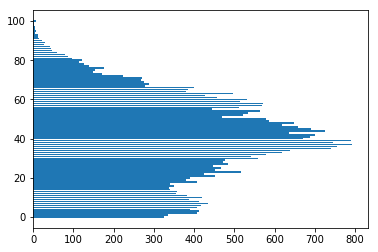

In [7]:
# 신도림동의 인구 데이터를 수평막대그래프로 나타내기
import csv
f = open('age.csv')
data = csv.reader(f)

result = []
for row in data:
    if '신도림' in row[0]:
        for i in row[3:]:
            result.append(int(i))

import matplotlib.pyplot as plt
plt.barh(range(101), result)
plt.show()

## 항아리 모양 그래프  
geder.csv를 활용해보기 이전에 해당 데이터의 인덱스를 짚고 넘어가자.  

|지역명|(남성)총인구|총인구2|0세|1세|...|99세|100세 이상|(여성)총인구1|총인구2|0세|1세|...|99세|100세 이상|  
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|  
|0|1|2|3|4|...|102|103|104|105|106|107|...|205|206|  

이 데이터를 barh() 함수로 나타내면 항아리 모양의 그래프를 얻을 수 있다.

찾고 싶은 지역의 이름을 알려주세요 : 서울특별시


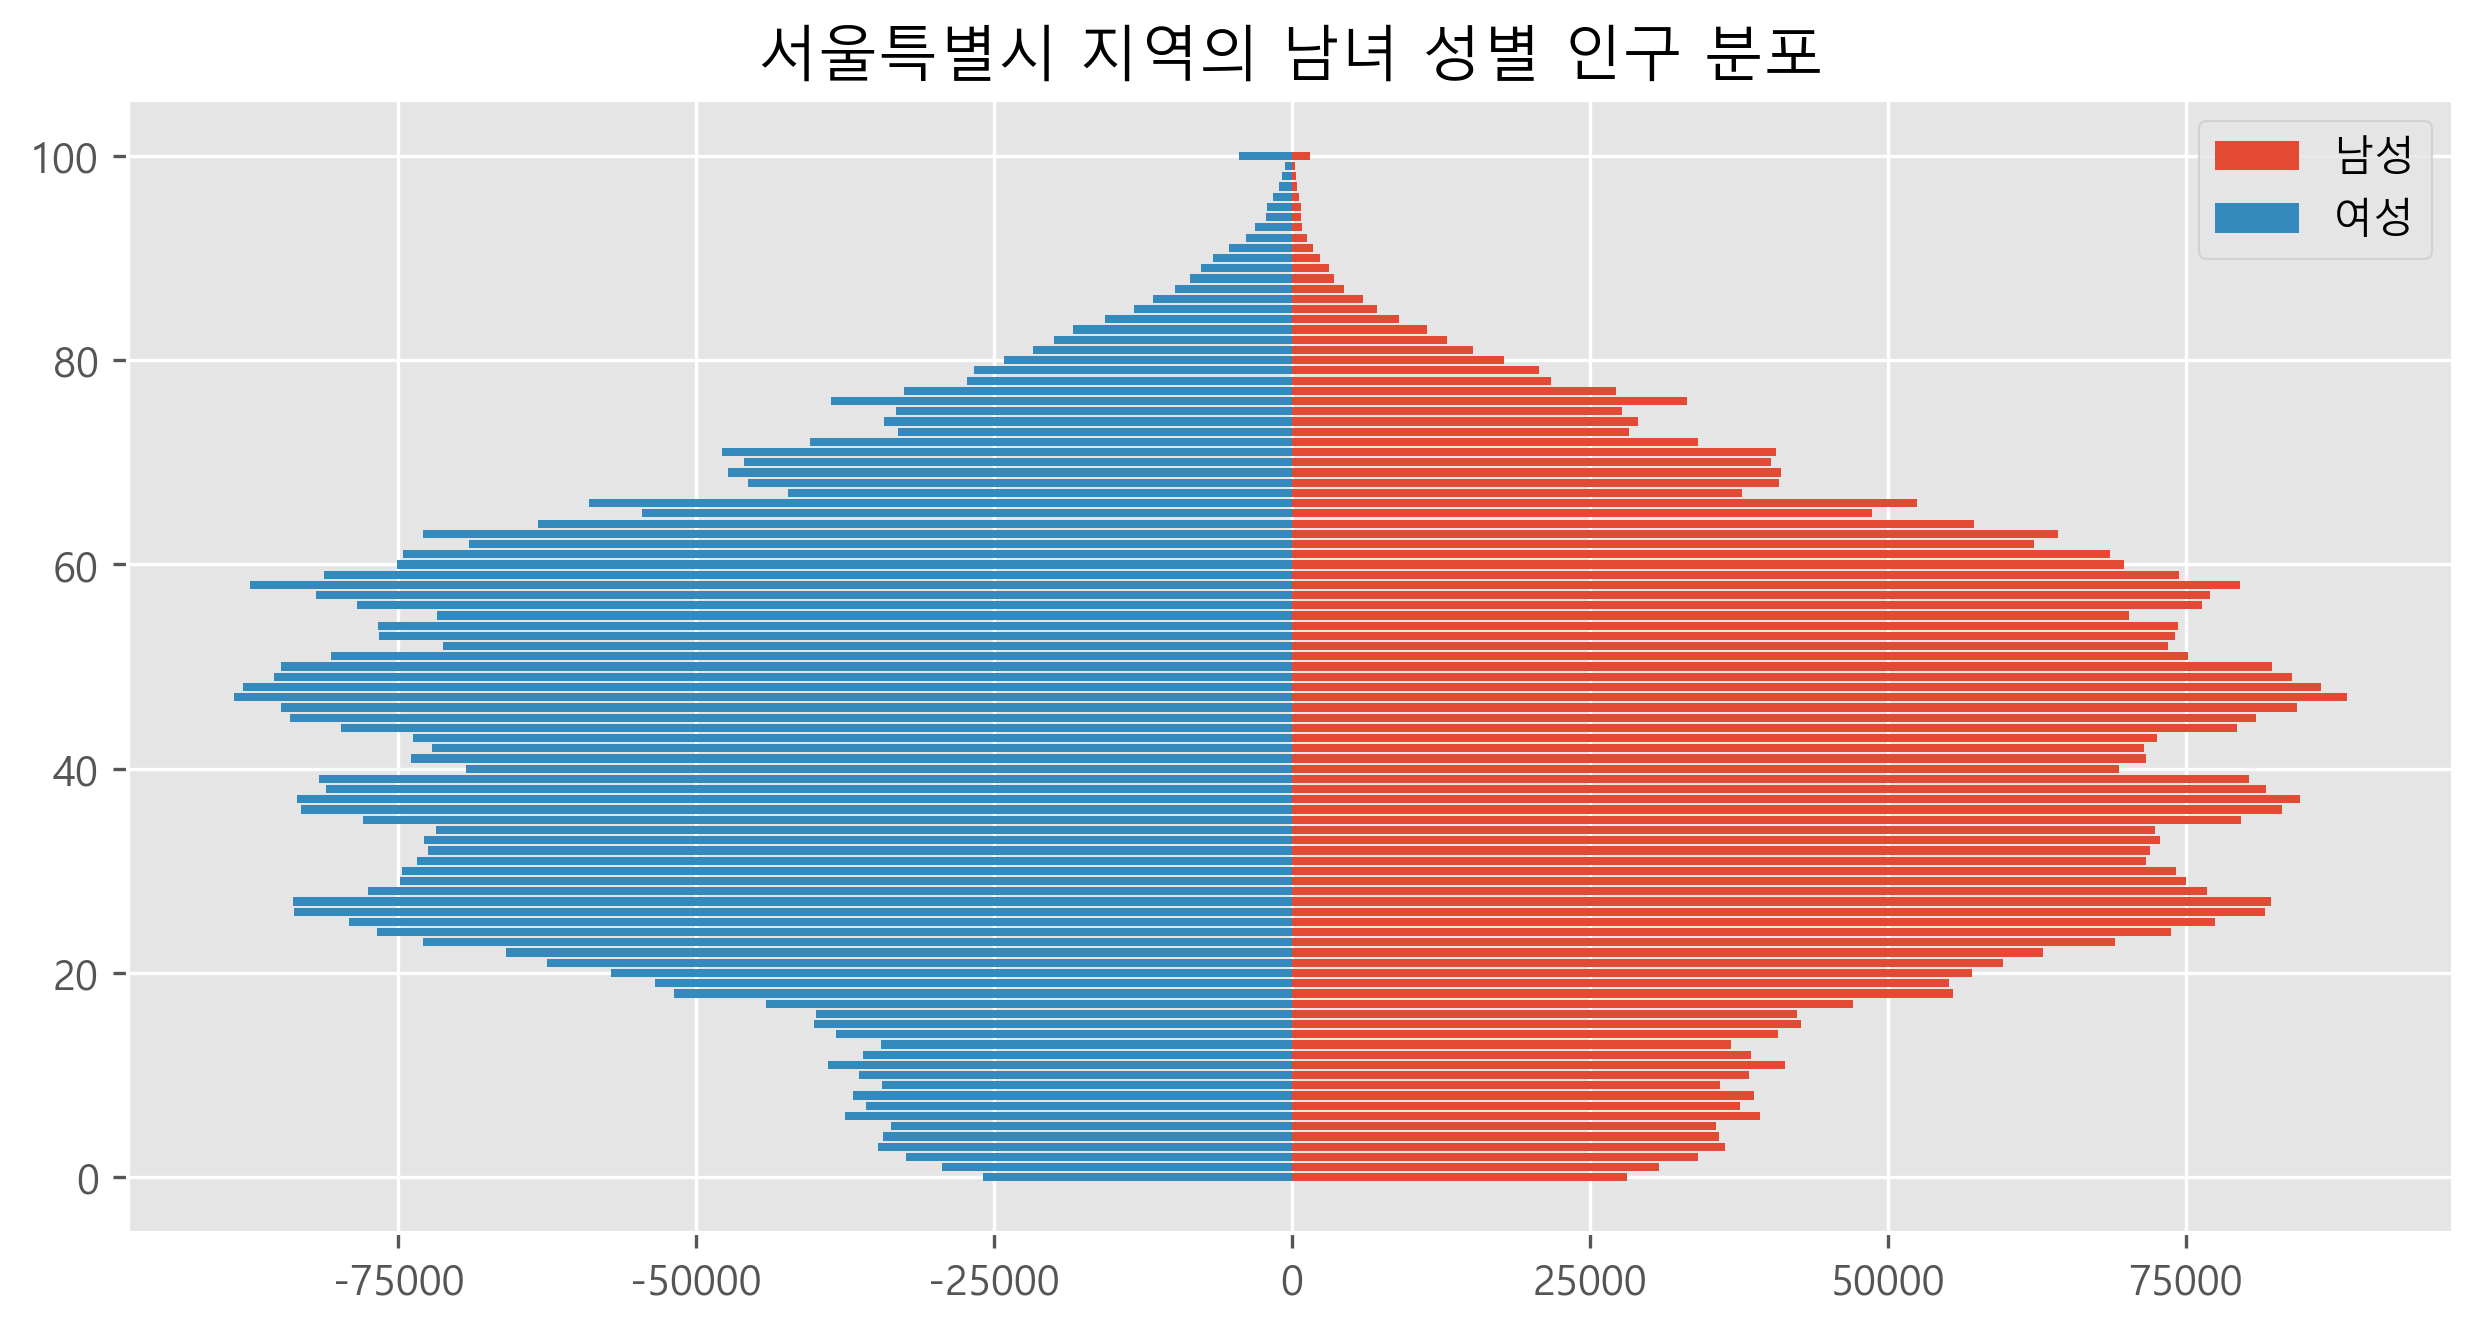

In [22]:
# 특정 지역의 인구 구조를 항아리 그래프로 그리기
import csv
f = open('gender.csv')
data = csv.reader(f)

m = []
f = []

name = input('찾고 싶은 지역의 이름을 알려주세요 : ')
for row in data:
    if name in row[0]:
        for i in range(101):
            m.append(int(row[3+i].replace(',', '')))
            f.append(-int(row[106 + i].replace(',', '')))
        break

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 5), dpi=300)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title(name + ' 지역의 남녀 성별 인구 분포')
plt.barh(range(101), m, label='남성')
plt.barh(range(101), f, label='여성')
plt.legend()
plt.show()

# UNIT 9 우리 동네 인구 구조를 파이차트로 나타내기  
'원그래프'라고도 불리는 파이 차트는 pie() 함수를 통해 나타낼 수 있다.  

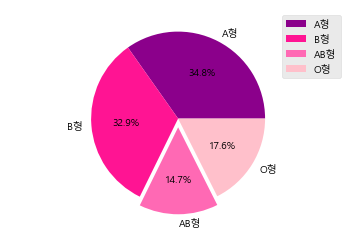

In [26]:
# 혈액형 비율 파이 차트로 나타내기
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']  # 데이터 라벨 설정(labels)
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']  # 색상 설정(colors)
plt.axis('equal')  # 차트가 찌그러진 모양이라면 axis() 함수를 통해 바꿀 수 있다.
# 라벨: labels, 색: colors, 돌출효과: explode
plt.pie(size, labels=label, autopct='%.1f%%', colors=color, explode=(0, 0, 0.1, 0))
# 파이 차트의 시작점을 바꾸려면 startangle 속성을 사용하면 된다.
plt.legend()
plt.show()

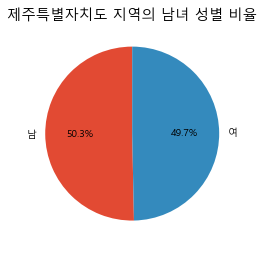

In [31]:
# 제주도의 성별 인구 비율 표현하기
import csv

f = open('gender.csv')
data = csv.reader(f)
m = 0
f = 0

for row in data:
    if '제주특별자치도' in row[0]:
        for i in range(101):
            m += int(row[3+i].replace(',', ''))
            f += int(row[106+i].replace(',', ''))

size = [m, f]

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.pie(size, labels=['남', '여'], autopct='%.1f%%', startangle=90)
plt.title('제주특별자치도 지역의 남녀 성별 비율')
plt.show()